In [2]:
import os

import pandas as pd
import seaborn as sns
import japanize_matplotlib
import matplotlib.pyplot as plt

## モデルごとに評価指標をプロット

* rmse: 外れ値の影響を強く受ける(0以外の値)ので、prophet + lightGBM, cnnなどで性能が高くなる

* mape: 定義上、0除算が発生すると非常に大きな値となるためあまり参考にならない(極論、全て0と予測するモデルが一番良いモデルとなる。)

* mae: ほとんどの値が0となっているためarimaなどの比較的単純なモデルで性能が高くなる。

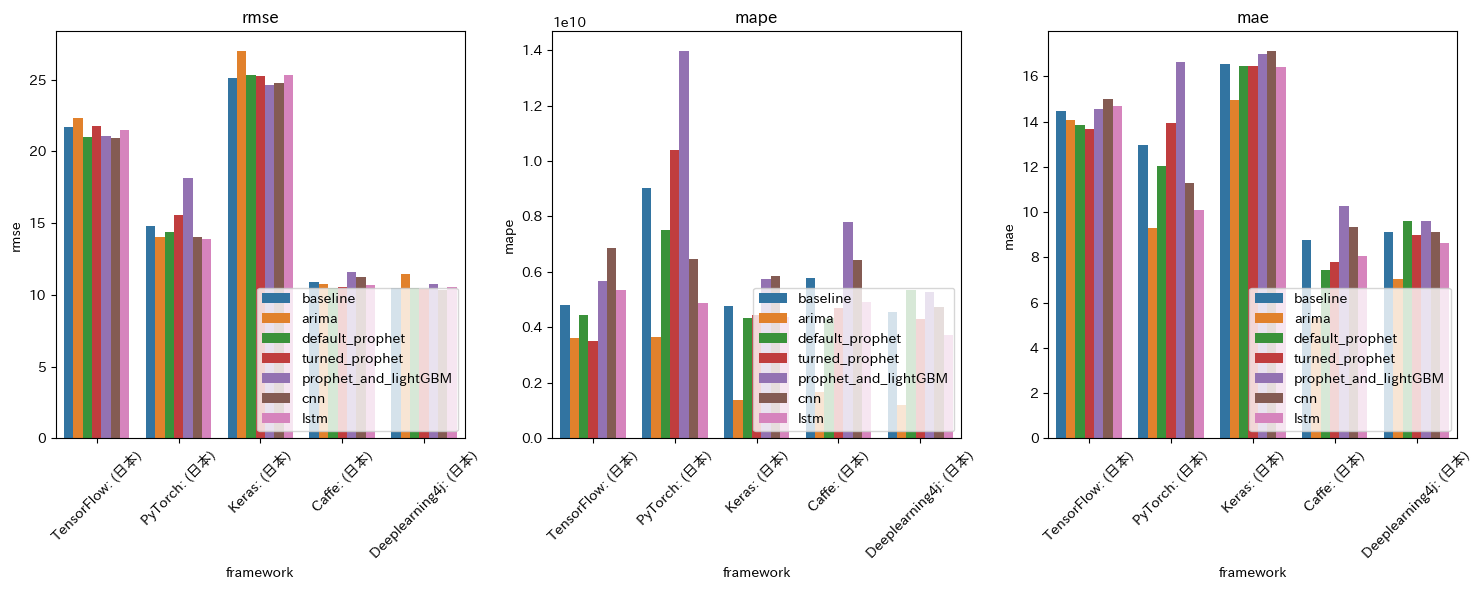

In [3]:
result_csv_dict = {
    'baseline': '../result/arima/baseline_scores.csv',
    'arima': '../result/arima/scores.csv',
    'default_prophet': '../result/prophet/defaults/scores.csv',
    'turned_prophet': '../result/prophet/parameter_tuned/scores.csv',
    'prophet_and_lightGBM': '../result/prophet/prohet_and_lightGBM/scores.csv',
    'cnn': '../result/dl_models/cnn/scores.csv',
    'lstm': '../result/dl_models/lstm/scores.csv'
}
result_df_list = []
for exp_name, csv_path in result_csv_dict.items():
    if not os.path.exists(csv_path):
        continue
    df = pd.read_csv(csv_path)
    df['exp_name'] = exp_name
    result_df_list.append(df)
result_df = pd.concat(result_df_list, ignore_index=True)
result_df
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
for i, score_name in enumerate(['rmse', 'mape', 'mae']):
    ax = axes[i]
    sns.barplot(data=result_df, x='framework', y=score_name, hue='exp_name', ax=ax)
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title(score_name)
    ax.legend(loc='lower right')
fig.tight_layout()
plt.show()